In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

from functions.datacleaning import MoscowHousing as mh
from functions.distance import get_distance_coordinates, norm_features

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup
import re

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
XTrain = pd.read_csv("../data/train_prepared_category_6.csv")
XTest = pd.read_csv("../data/test_prepared_category_6.csv")

In [3]:

"""
# Start web session for collecting coordinates to metro stations
service = Service('/usr/local/bin/chromedriver')
service.start()
driver = webdriver.Remote(service.service_url)
driver.get('https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations')

# Get content from web page
content = driver.page_source

# Find all spans with coordinates
soup = BeautifulSoup(content, features="html.parser")
spans = soup.find_all('span', class_="geo-dec")
driver.quit()

# Collect coordinates for all metro stations in Moscow
coordinates = []
numbers = re.compile(r'\d+(?:\.\d+)?')
# iterate all spans with coordinates
for span in spans:
    coord = span.get_text()
    coord = numbers.findall(coord)
    coord = [float(x) for x in coord]
    coordinates.append(tuple(coord))

# Close browser connection
driver.quit()

"""

'\n# Start web session for collecting coordinates to metro stations\nservice = Service(\'/usr/local/bin/chromedriver\')\nservice.start()\ndriver = webdriver.Remote(service.service_url)\ndriver.get(\'https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations\')\n\n# Get content from web page\ncontent = driver.page_source\n\n# Find all spans with coordinates\nsoup = BeautifulSoup(content, features="html.parser")\nspans = soup.find_all(\'span\', class_="geo-dec")\ndriver.quit()\n\n# Collect coordinates for all metro stations in Moscow\ncoordinates = []\nnumbers = re.compile(r\'\\d+(?:\\.\\d+)?\')\n# iterate all spans with coordinates\nfor span in spans:\n    coord = span.get_text()\n    coord = numbers.findall(coord)\n    coord = [float(x) for x in coord]\n    coordinates.append(tuple(coord))\n\n# Close browser connection\ndriver.quit()\n\n'

In [4]:
#coordinates_df = pd.DataFrame(coordinates,columns=["latitude", "longitude"])

In [5]:
#coordinates_df.head()

In [6]:
#coordinates_df.to_csv("moscow_metros.csv", index=False)

In [7]:
"""

# Get data
data = mh(coordinates)
features = ["area_total", "distance", "distance_metro", "floor", "district"]
XTrain, YTrain = data.get_data_train()
XTest = data.get_data_test()

X_Train = XTrain.copy() # Keep originals
X_Test = XTest.copy()   #
Y_Train = YTrain.copy() #

"""

'\n\n# Get data\ndata = mh(coordinates)\nfeatures = ["area_total", "distance", "distance_metro", "floor", "district"]\nXTrain, YTrain = data.get_data_train()\nXTest = data.get_data_test()\n\nX_Train = XTrain.copy() # Keep originals\nX_Test = XTest.copy()   #\nY_Train = YTrain.copy() #\n\n'

In [8]:
#XTrain.to_csv("train_prepared.csv", index=False)
#XTest.to_csv("test_prpared.csv", index=False)

In [9]:
XTrain.head()

,Unnamed: 0,id,price,area_total,area_kitchen,area_living,floor,rooms,ceiling,building_id,...,district_9.0,district_10.0,district_11.0,district_nan,elevator,elevator_no,balconies_yes,loggias_yes,bathrooms_shared_yes,bathrooms_private_yes
0,0,0,7139520.0,-0.259939,-0.007962,-0.246552,-0.837486,-0.175954,-0.057242,4076,...,0,0,0,0,1,0,0,0,0,1
1,36,1,10500000.0,0.230930,-0.388730,-0.787980,1.085119,0.753302,-0.059725,1893,...,0,0,0,0,1,0,1,0,1,0
2,38,2,9019650.0,0.069012,-0.997958,-0.765686,0.364142,0.753302,-0.057242,5176,...,0,0,0,0,1,0,0,0,0,1
3,37,3,10500000.0,0.230930,-0.236423,-0.724282,1.085119,0.753302,-0.055312,1893,...,0,0,0,0,1,0,0,1,0,1
4,60,4,13900000.0,0.060489,0.438011,0.450934,-0.236672,-0.175954,0.027425,6604,...,0,0,0,0,1,0,0,1,1,0


In [10]:
XTest.head()

,Unnamed: 0,id,area_total,area_kitchen,area_living,floor,rooms,ceiling,building_id,latitude,...,district_9.0,district_10.0,district_11.0,district_nan,elevator,elevator_no,balconies_yes,loggias_yes,bathrooms_shared_yes,bathrooms_private_yes
0,0,23285,-0.066435,0.275148,-0.031875,-0.902184,-1.086301,0.002551,5148,0.863647,...,0,0,0,0,1,1,1,0,0,0
1,12,23286,-0.375168,-0.563372,-0.829698,-0.651025,-1.086301,-0.025882,1290,0.313897,...,0,0,0,0,1,0,0,0,0,0
2,15,23287,-0.634220,-0.170817,-0.500842,0.102453,-1.086301,-0.013713,681,1.387559,...,0,0,0,0,1,0,0,0,1,0
3,76,23288,-0.252739,0.178121,-0.476706,-0.525445,-0.183216,-0.058176,4261,0.942597,...,0,0,0,0,1,1,0,0,1,0
4,78,23289,-0.730034,-0.926849,-0.368093,0.604772,-1.086301,-0.058176,7530,0.099888,...,0,0,0,0,1,0,0,1,1,0


In [11]:
drop_features = ["Unnamed: 0",
                 "id", 
                 "street", 
                 "address",
                 "building_id",
                 "phones_0.0", "phones_1.0", "phones_2.0", "phones_nan",
                 "layout_0.0", "layout_1.0", "layout_2.0", "layout_nan",
                 "new_0.0", "new_1.0", "new_nan"]

X_Train = XTrain.copy()
X_Test = XTest.copy()

X_Train = X_Train.drop(drop_features, axis=1)
X_Test = X_Test.drop(drop_features, axis=1)

X_Train = X_Train.drop("price", axis=1)
#features_4 = D4_train.columns.values.tolist()

# Real prices
Y_Train = XTrain["price"].copy()

# Log prices (ln) 
Y_Train = np.log(Y_Train)

# Normalize
Y_Train = norm_features(Y_Train)

# Log 10 prices (log10) 
#Y_Train = np.log10(Y_Train)


In [12]:
XTrain.shape  # Should be 9937 examples

(23285, 98)

In [13]:
XTest.head()  # All features

,Unnamed: 0,id,area_total,area_kitchen,area_living,floor,rooms,ceiling,building_id,latitude,...,district_9.0,district_10.0,district_11.0,district_nan,elevator,elevator_no,balconies_yes,loggias_yes,bathrooms_shared_yes,bathrooms_private_yes
0,0,23285,-0.066435,0.275148,-0.031875,-0.902184,-1.086301,0.002551,5148,0.863647,...,0,0,0,0,1,1,1,0,0,0
1,12,23286,-0.375168,-0.563372,-0.829698,-0.651025,-1.086301,-0.025882,1290,0.313897,...,0,0,0,0,1,0,0,0,0,0
2,15,23287,-0.634220,-0.170817,-0.500842,0.102453,-1.086301,-0.013713,681,1.387559,...,0,0,0,0,1,0,0,0,1,0
3,76,23288,-0.252739,0.178121,-0.476706,-0.525445,-0.183216,-0.058176,4261,0.942597,...,0,0,0,0,1,1,0,0,1,0
4,78,23289,-0.730034,-0.926849,-0.368093,0.604772,-1.086301,-0.058176,7530,0.099888,...,0,0,0,0,1,0,0,1,1,0


In [14]:
X_Test.head()  # Only with features

,area_total,area_kitchen,area_living,floor,rooms,ceiling,latitude,longitude,constructed,stories,...,district_9.0,district_10.0,district_11.0,district_nan,elevator,elevator_no,balconies_yes,loggias_yes,bathrooms_shared_yes,bathrooms_private_yes
0,-0.066435,0.275148,-0.031875,-0.902184,-1.086301,0.002551,0.863647,0.988802,0.624490,0.176445,...,0,0,0,0,1,1,1,0,0,0
1,-0.375168,-0.563372,-0.829698,-0.651025,-1.086301,-0.025882,0.313897,1.064595,0.497565,-0.289743,...,0,0,0,0,1,0,0,0,0,0
2,-0.634220,-0.170817,-0.500842,0.102453,-1.086301,-0.013713,1.387559,0.866866,0.497565,-0.849169,...,0,0,0,0,1,0,0,0,1,0
3,-0.252739,0.178121,-0.476706,-0.525445,-0.183216,-0.058176,0.942597,0.276288,0.793723,-0.103268,...,0,0,0,0,1,1,0,0,1,0
4,-0.730034,-0.926849,-0.368093,0.604772,-1.086301,-0.058176,0.099888,0.069213,0.793723,-0.103268,...,0,0,0,0,1,0,0,1,1,0


In [15]:
X = X_Train.copy() # Keep prepared "originals" (the real orig = XTrain)
y = Y_Train.copy() #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoostRegressor

In [16]:
"""

# Kaggle score on this prediction is: 0.29393 (best single model performance until now)

modelCBR = CatBoostRegressor(
    n_estimators=1000,
    learning_rate=0.008,
    thread_count=-1,
    depth=7,
    silent=True,
    random_seed=42,
    bagging_temperature=0.2
#     od_type="Iter"
)


1. Default from Ensembele ---------------------> mse 0.36905
2. change n_estimators = 1000 (default 500) ---> mse 0.36763 # Choose this 1000
3. change n_estimators = 5000 -----------------> mse 0.37690
4. n_estim = 1000 lr = 0.08 (default 0.1) -----> mse 0.36366

5. removing district and rooms ----------------> mse 0.35049
6. removing rooms -----------------------------> mse 0.33331 # Choose this

7.  lr = 0.04 ---------------------------------> mse 0.32079
8.  lr = 0.02 ---------------------------------> mse 0.32118
9.  lr = 0.009 --------------------------------> mse 0.31140
10. lr = 0.008 --------------------------------> mse 0.31097 # Choose this 0.008

11. depth = 10 (default 7) --------------------> mse 0.32140
12. depth = 9 ---------------------------------> mse 0.31622 # Choose default 7

13. added "distance_metro" (not normalized, m) > mse 0.29202 # Choose this

"""

'\n\n# Kaggle score on this prediction is: 0.29393 (best single model performance until now)\n\nmodelCBR = CatBoostRegressor(\n    n_estimators=1000,\n    learning_rate=0.008,\n    thread_count=-1,\n    depth=7,\n    silent=True,\n    random_seed=42,\n    bagging_temperature=0.2\n#     od_type="Iter"\n)\n\n\n1. Default from Ensembele ---------------------> mse 0.36905\n2. change n_estimators = 1000 (default 500) ---> mse 0.36763 # Choose this 1000\n3. change n_estimators = 5000 -----------------> mse 0.37690\n4. n_estim = 1000 lr = 0.08 (default 0.1) -----> mse 0.36366\n\n5. removing district and rooms ----------------> mse 0.35049\n6. removing rooms -----------------------------> mse 0.33331 # Choose this\n\n7.  lr = 0.04 ---------------------------------> mse 0.32079\n8.  lr = 0.02 ---------------------------------> mse 0.32118\n9.  lr = 0.009 --------------------------------> mse 0.31140\n10. lr = 0.008 --------------------------------> mse 0.31097 # Choose this 0.008\n\n11. depth =

In [17]:
#modelCBR.fit(X_train, y_train)

In [18]:
#cat_prediction = modelCBR.predict(X_test)

In [19]:
#cat_mse = round(mean_squared_error(cat_prediction, y_test), 5)
#print('Test MSE:', cat_mse)
#print('Test RMSE:', np.sqrt(cat_mse))

In [20]:
#cat_prediction_REAL = modelCBR.predict(XTest[features])

In [21]:
# Kaggle score on this prediction is: 0.29393 (best single performance until now)
#data.write_results("cat_prediction.csv", cat_prediction_REAL)

In [22]:
#plt.scatter(cat_prediction, y_test)
#plt.xlabel('CatBoost prediction')
#plt.ylabel('Ground Truth')

In [23]:
#importances = modelCBR.feature_importances_
#forest_importances = pd.Series(importances, index=X.columns)

#fig, ax=plt.subplots(1, 1, figsize=(14,6))
#forest_importances.plot.bar(ax=ax)
#ax.set_title("Gini Importance")
#ax.set_ylabel("Importance")
#fig.tight_layout()

In [24]:
#ax = sns.boxplot(data=XTrain, orient="h", palette="Set2")

Text(0, 0.5, 'Ground Truth')

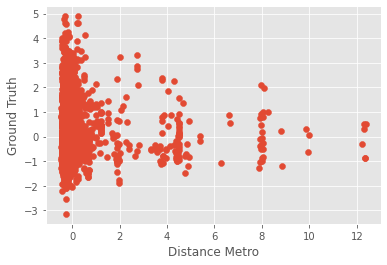

In [25]:
plt.scatter((X_test["distance_metro"]), y_test)
plt.xlabel('Distance Metro')
plt.ylabel('Ground Truth')

# CatBoost optimized hyperparmeters catergory_6 data

In [26]:
# category_6 data
#df_train_4 = pd.read_csv("../data/train_prepared_category_6.csv")
#df_test_4 = pd.read_csv("../data/test_prepared_category_6.csv")

In [27]:
# Keep originals
X = X_Train.copy()
y = Y_Train.copy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

# Comparing models and datasets on CatBoost

In [29]:
# Using optimized hyperparameter for complete category_4 data
modelCBR = CatBoostRegressor(
    n_estimators=1968,
    learning_rate=0.05798827431610841,
    thread_count=-1,
    depth=12,
    silent=True,
    random_seed=42,
    bagging_temperature=0.1058370968938238
#     od_type="Iter"
)

modelCBR.fit(X_train, y_train)
cat_prediction = modelCBR.predict(X_test)

cat_mse = round(mean_squared_error(cat_prediction, y_test), 5)
print('Test MSE:', cat_mse)
print("Test RMSE: ", np.sqrt(cat_mse))

Test MSE: 0.06687
Test RMSE:  0.2585923432741194


In [30]:
"""
# Using optimized hyperparameter for complete category_4 data
modelCBR2 = CatBoostRegressor(n_estimators=2343,
                             learning_rate=0.058500478169372754,
                             thread_count=-1,
                             depth=12,
                             silent=True,
                             random_seed=42,
                             bagging_temperature=0.08070463240695834)

modelCBR2.fit(X_train, y_train)
cat_prediction2 = modelCBR2.predict(X_test)

cat_mse2 = round(mean_squared_error(cat_prediction2, y_test), 5)
print('Test MSE:', cat_mse2)
print("Test RMSE: ", np.sqrt(cat_mse2))
"""

'\n# Using optimized hyperparameter for complete category_4 data\nmodelCBR2 = CatBoostRegressor(n_estimators=2343,\n                             learning_rate=0.058500478169372754,\n                             thread_count=-1,\n                             depth=12,\n                             silent=True,\n                             random_seed=42,\n                             bagging_temperature=0.08070463240695834)\n\nmodelCBR2.fit(X_train, y_train)\ncat_prediction2 = modelCBR2.predict(X_test)\n\ncat_mse2 = round(mean_squared_error(cat_prediction2, y_test), 5)\nprint(\'Test MSE:\', cat_mse2)\nprint("Test RMSE: ", np.sqrt(cat_mse2))\n'

In [31]:
modelCBR.fit(X_train, y_train)
#modelCBR2.fit(X_train, y_train)

In [32]:
cat_prediction = modelCBR.predict(X_test)
#cat_prediction2 = modelCBR2.predict(X_test)

Text(0, 0.5, 'Ground Truth')

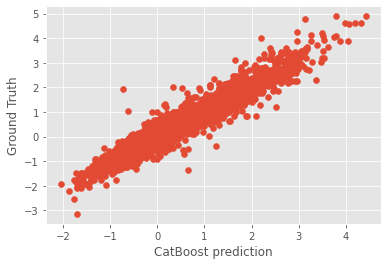

In [33]:
plt.scatter(cat_prediction, y_test)
plt.xlabel('CatBoost prediction')
plt.ylabel('Ground Truth')

In [34]:
#plt.scatter(cat_prediction2, y_test)
#plt.xlabel('CatBoost prediction')
#plt.ylabel('Ground Truth')

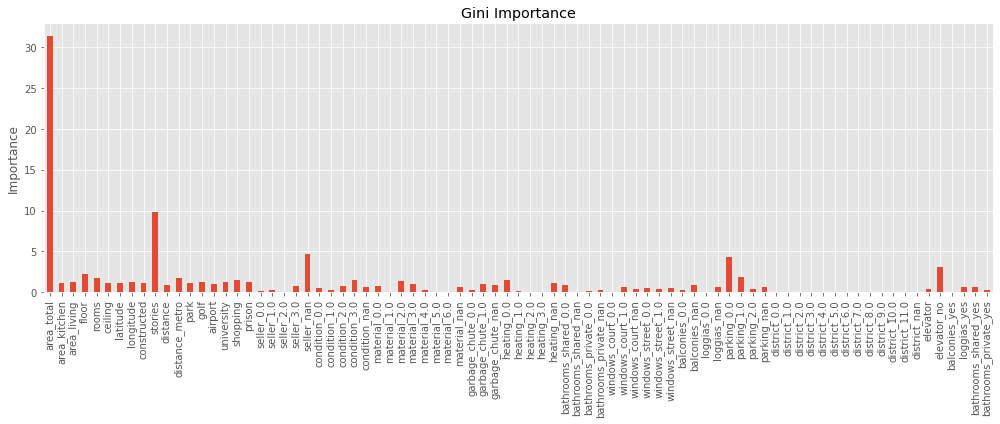

In [35]:
importances = modelCBR.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax=plt.subplots(1, 1, figsize=(14,6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()

In [36]:
"""
importances = modelCBR2.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax=plt.subplots(1, 1, figsize=(14,6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()
"""

'\nimportances = modelCBR2.feature_importances_\nforest_importances = pd.Series(importances, index=X.columns)\n\nfig, ax=plt.subplots(1, 1, figsize=(14,6))\nforest_importances.plot.bar(ax=ax)\nax.set_title("Gini Importance")\nax.set_ylabel("Importance")\nfig.tight_layout()\n'

# Choose the best model for prediction for kaggle

In [49]:
kaggle_predicton = modelCBR.predict(X_Test) # Kaggle 1 score 0.29942 cat_6 hyper cat_5 log10

# Submission of prediction to kaggle

In [54]:
submission = pd.DataFrame(XTest["id"])

# If ln prices - revert:
#submission["price_prediction"] =  np.exp(kaggle_predicton)

# If log10 prices - revert:
#submission["price_prediction"] = np.power(10, kaggle_predicton)

# If ln prices also are normalized
submission["price_prediction"] = revert_ln(XTrain["price"], kaggle_predicton)

submission.to_csv("predictions_TUNED_CatBoost.csv", index=False)

# Grab generated file to sanity check values
df = pd.read_csv("predictions_TUNED_CatBoost.csv")
df.shape
df.head()

,id,price_prediction
0,23285,1.577859e+07
1,23286,1.490948e+07
2,23287,6.797664e+06
3,23288,1.128458e+07
4,23289,6.427174e+06


In [39]:
pri = XTrain["price"].copy()

In [40]:
pri.head()

0     7139520.0
1    10500000.0
2     9019650.0
3    10500000.0
4    13900000.0
Name: price, dtype: float64

In [41]:
pri_ln = np.log(pri)
pri_ln.head()

0    15.781156
1    16.166886
2    16.014916
3    16.166886
4    16.447399
Name: price, dtype: float64

In [42]:
pri_ln_mean = pri_ln.mean()
pri_ln_std = pri_ln.std()

In [44]:
rev = pri_ln_mean + pri_ln_std * norm_features(pri_ln)
rev.head()

0    15.781156
1    16.166886
2    16.014916
3    16.166886
4    16.447399
Name: price, dtype: float64

In [45]:
print(np.exp(rev))

0         7139520.0
1        10500000.0
2         9019650.0
3        10500000.0
4        13900000.0
            ...    
23280    13300000.0
23281    15854300.0
23282    19800000.0
23283    29999000.0
23284    10950000.0
Name: price, Length: 23285, dtype: float64
